In [32]:
import pandas as pd
df2 = pd.read_csv('/Users/ray/SQU_Dataset.csv')



df2['English Description'].fillna(value='Missing', inplace=True)
#df2['Course Level'].fillna(value='Missing', inplace=True)

#drop rows where y1 and y2 are equal
#df2 = df.loc[(df["Institution"] == "SQU" )]


df2.head()

,COLLEGE,College Abbreviation,Course Code,Course Internal Number,Course Short Name,Course Long Name,VERSION,Course Status,DEPARTMENT,English Description,Arabic Description,Course Type,Contact Hours,Course Credits,PREQUISITES,EQUIVALENCES,CO-Requisites
0,Administration,ADM,COMT0001,17653,College Meetings,College Meetings,1,Active,Booking,College Meetings,???????? ??????,Project,999,0,No Prequisites,No Equivalences,No CO-Requisites
1,Administration,ADM,DPMT0001,17654,Departmental Meeting,Departmental Meetings,1,Active,Booking,Departmental Meetings,???????? ?????,Project,999,0,No Prequisites,No Equivalences,No CO-Requisites
2,College of Agricultural & Marine Sciences,AGR,CAMS1000,21193,SQU Under.Acad.Reg.,SQU Undergraduate Academic Regulations (UE),1,Active,Office of the Dean (Agriculture),The course aims to introduce Rules and Regulat...,???? ?????? ??? ????? ?????? ??????? ????? ???...,Lecture,26,2,No Prequisites,No Equivalences,No CO-Requisites
3,College of Agricultural & Marine Sciences,AGR,CAMS2000,19742,Introduction to CAMS,Introduction to Agricultural and Marine Sciences,2,Active,Office of the Dean (Agriculture),This course introduces incoming students to th...,???? ?????? ??? ????? ?????? ????? ??????? ???...,Lecture,30,0,No Prequisites,No Equivalences,No CO-Requisites
4,College of Agricultural & Marine Sciences,AGR,CAMS2003,18102,Food & Resources Eco,Introduction to Food and Resource Economics,1,Active,Office of the Dean (Agriculture),Introductory course in economic theory with ap...,????? ??? ?????? ????? ?? ???????? ?????????? ...,Lecture,45,3,(FPEL0560 or FPEL0600 or FPEL0601 or FPEL0602 ...,"ECON2003(2-way),AGEC2003(2-way),NREC2003(2-way)",No CO-Requisites


In [34]:
title=df2["DEPARTMENT"].tolist()
description=df2["English Description"].tolist()

In [35]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['Course','course','Student','student']
stopwords.extend(newStopWords)

In [36]:
import string
import re
X1 = (df2['English Description']).values
l=len(X1)

for i in range(l):
    #remove special characters
    translator=str.maketrans('','',string.punctuation)
    X1[i]=X1[i].translate(translator)
    
    #convert to lower case
    X1[i]=X1[i].lower()
    
    #remove numbers
    X1[i]=re.sub(r'\d+', '', X1[i])
    X1[i]=re.sub("course", '', X1[i])
    X1[i]=re.sub("Course", '', X1[i])
    X1[i]=re.sub("Student", '', X1[i])
    X1[i]=re.sub("student", '', X1[i])



    
    #remove leading and ending whitespaces
    #des[i] = des[i].strip()
   
    #remove stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(X1[i])
    tokens_without_sw = [j for j in tokens if not j in stop_words]
    X1[i] = (" ").join(tokens_without_sw)
    
  
    #stemming 
    """
    sentence=""
    from nltk.stem import PorterStemmer
    ps = PorterStemmer()
    words = word_tokenize(X1[i])
   
    for w in words:
        sentence= sentence + " " +ps.stem(w) + " "
        
    X1[i]=sentence
    
    sentence2=""
    from nltk.stem import WordNetLemmatizer
    lemmatizer=WordNetLemmatizer()
    input_str=word_tokenize(X1[i])
    for word in input_str:
        sentence2= sentence2 + " " +lemmatizer.lemmatize(word)+ " "
    
    X1[i]=sentence2
    """

#print(y_test)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'}, ngram_range=(1,3),min_df=1, analyzer="word",max_df=0.25)
X = vectorizer.fit_transform(X1)

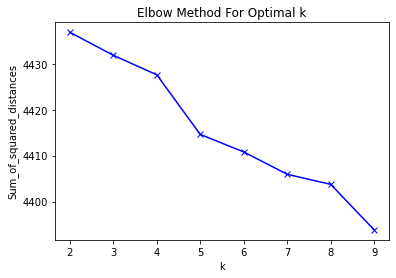

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
true_k = 9
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                                    title  cluster
280            Food Science and Nutrition        0
3267   Petroleum and Chemical Engineering        0
3268   Petroleum and Chemical Engineering        0
3269   Petroleum and Chemical Engineering        0
3270   Petroleum and Chemical Engineering        0
...                                   ...      ...
2786  Electrical and Computer Engineering        8
2785  Electrical and Computer Engineering        8
3540        Office of the Dean (Medicine)        8
2795  Electrical and Computer Engineering        8
2792  Electrical and Computer Engineering        8

[4467 rows x 2 columns]


Cluster: 0


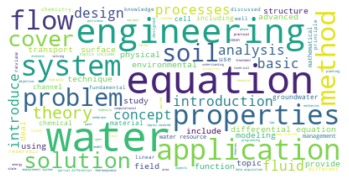

Cluster: 1


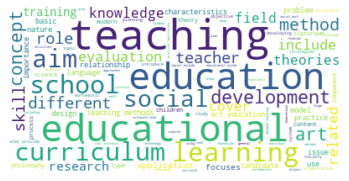

Cluster: 2


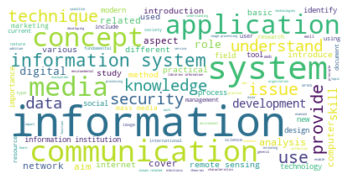

Cluster: 3


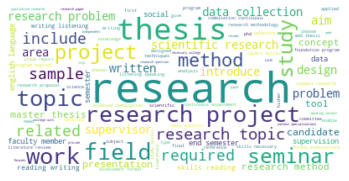

Cluster: 4


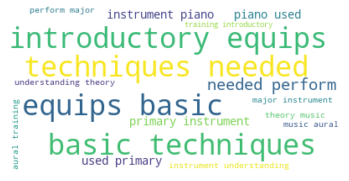

Cluster: 5


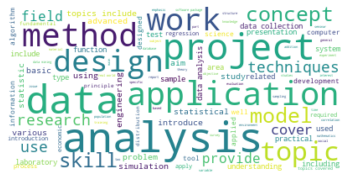

Cluster: 6


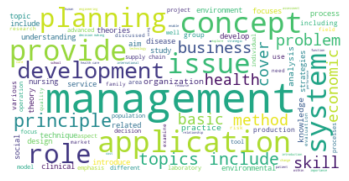

Cluster: 7


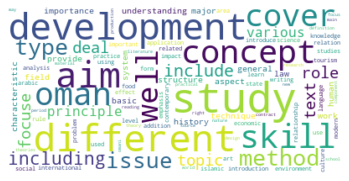

Cluster: 8


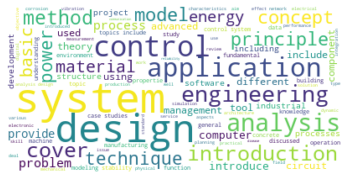

In [39]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':X1}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   #print('Titles')
   #titles=wiki_cl[wiki_cl.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   s= str(k) + 'SQU.png'
   plt.savefig(s)
   plt.show()

In [40]:
titles_1=wiki_cl[wiki_cl.cluster==0]['title']     

In [41]:
titles_2=wiki_cl[wiki_cl.cluster==1]['title']    
titles_3=wiki_cl[wiki_cl.cluster==2]['title']     
titles_4=wiki_cl[wiki_cl.cluster==3]['title']     
titles_5=wiki_cl[wiki_cl.cluster==4]['title'] 
titles_6=wiki_cl[wiki_cl.cluster==5]['title']    
titles_7=wiki_cl[wiki_cl.cluster==6]['title']    
titles_8=wiki_cl[wiki_cl.cluster==7]['title']  
titles_9=wiki_cl[wiki_cl.cluster==8]['title']    

In [42]:
print(len(titles_1))
print(len(titles_2))
print(len(titles_3))
print(len(titles_4))
print(len(titles_5))
print(len(titles_6))
print(len(titles_7))
print(len(titles_8))
print(len(titles_9))

263
401
231
271
20
510
806
1498
467


In [43]:
def freq(titles):
    count_freq = {}
    for item in titles:
        if item in count_freq:
            count_freq[item] +=1
        else:
            count_freq[item] = 1
        
    sorted_titles = sorted(count_freq.items(), key=lambda item: item[1], reverse = True)
    for i in range(10):
        print(sorted_titles[i])
        

In [44]:
print("Frequency of Fields in Cluster 0: ")
print(freq(titles_1))

Frequency of Fields in Cluster 0: 
('Civil & Architectural Engineering', 39)
('Petroleum and Chemical Engineering', 39)
('Mathematics', 27)
('Soils, Water, and Agricultural Engineering', 25)
('Mechanical and Industrial Engineering', 21)
('Electrical and Computer Engineering', 17)
('Physics', 15)
('Chemistry', 11)
('Geography', 10)
('Biology', 7)
None


In [45]:
print("Frequency of Fields in Cluster 1: ")
print(freq(titles_2))

Frequency of Fields in Cluster 1: 
('Curriculum and Methods', 99)
('Foundations and Educational Administration', 68)
('Psychology', 52)
('Sociology and Social Work', 37)
('Early Childhood Education', 30)
('Instructional and Teaching Technologies', 29)
('Physical Education', 19)
('Art Education', 16)
('Mass Communication', 5)
('Electrical and Computer Engineering', 5)
None


In [46]:
print("Frequency of Fields in Cluster 2: ")
print(freq(titles_3))

Frequency of Fields in Cluster 2: 
('Information Studies', 54)
('Information Systems', 29)
('Mass Communication', 26)
('Geography', 14)
('Electrical and Computer Engineering', 10)
('Civil & Architectural Engineering', 10)
('Computer Science', 10)
('Mechanical and Industrial Engineering', 7)
('Private Law', 7)
('Earth Science', 6)
None


In [47]:
print("Frequency of Fields in Cluster 3: ")
print(freq(titles_4))

Frequency of Fields in Cluster 3: 
('Psychology', 21)
('Office of the Dean (Medicine)', 14)
('English For Science Department(CPS)', 13)
('Curriculum and Methods', 13)
('Foundations and Educational Administration', 11)
('History', 10)
('Sociology and Social Work', 9)
('Civil & Architectural Engineering', 9)
('Nursing', 8)
('Information Studies', 7)
None


In [53]:
print("Frequency of Fields in Cluster 4: ")
print(freq(titles_5))

Frequency of Fields in Cluster 4: 
('Music and Musical Science', 20)


IndexError: list index out of range

In [49]:
print("Frequency of Fields in Cluster 5: ")
print(freq(titles_6))

Frequency of Fields in Cluster 5: 
('Geography', 36)
('Earth Science', 36)
('Computer Science', 36)
('Mathematics', 34)
('Statistics (College Science)', 32)
('Mechanical and Industrial Engineering', 30)
('Operations Management and Business Statistics', 28)
('Information Studies', 17)
('Civil & Architectural Engineering', 17)
('Chemistry', 15)
None


In [50]:
print("Frequency of Fields in Cluster 6: ")
print(freq(titles_7))

Frequency of Fields in Cluster 6: 
('Nursing', 99)
('Management', 50)
('Operations Management and Business Statistics', 49)
('Animal and Veterinary Sciences', 43)
('Psychology', 41)
('Economics and Finance', 32)
('Crop Sciences', 30)
('Sociology and Social Work', 28)
('Geography', 27)
('Information Systems', 25)
None


In [51]:
print("Frequency of Fields in Cluster 7: ")
print(freq(titles_8))

Frequency of Fields in Cluster 7: 
('English', 95)
('Tourism', 95)
('Arabic', 86)
('Islamic Science', 73)
('Geography', 72)
('History', 58)
('Private Law', 52)
('Mass Communication', 46)
('Sociology and Social Work', 46)
('Public Law', 44)
None


In [52]:
print("Frequency of Fields in Cluster 8: ")
print(freq(titles_9))

Frequency of Fields in Cluster 8: 
('Electrical and Computer Engineering', 104)
('Mechanical and Industrial Engineering', 74)
('Civil & Architectural Engineering', 53)
('Computer Science', 29)
('Office of the Dean (Engineering)', 21)
('Petroleum and Chemical Engineering', 19)
('Mathematics', 17)
('Physics', 11)
('Biology', 10)
('Public Law', 9)
None


In [ ]:
wiki_cl.head()

In [30]:
wiki_cl.to_csv('/Users/ray/wiki_cl.csv')
